In [185]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from math import pi, sqrt
from numpy import std, mean, sqrt

In [186]:
exp_dict = {0:'Delay', 1:'Delay + predictor', 2: 'No delay'}

In [187]:
conn = sqlite3.connect("data.db")
hits_df = pd.read_sql_query("select rowid, * from actors where valid=1;", conn)
hits = np.array(hits_df[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
sigmas = np.std(hits, axis=0)
mus = np.mean(hits, axis=0)
variances = sigmas**2
print('{:10}{}'.format('Mu', mus))
print('{:10}{}'.format('Sigma', sigmas))
print('{:10}{}'.format('Variance', variances))
print()
# print(np.mean(sigmas))
print(hits[...,1].tolist())

Mu        [ 6.19298246  7.49122807 15.94736842]
Sigma     [1.71104356 1.95674996 3.89971233]
Variance  [ 2.92767005  3.82887042 15.20775623]

[9, 9, 9, 14, 12, 9, 9, 9, 5, 8, 5, 8, 7, 7, 7, 8, 8, 12, 8, 7, 7, 9, 5, 8, 9, 4, 8, 9, 10, 7, 7, 7, 8, 8, 8, 9, 4, 6, 8, 7, 7, 7, 4, 6, 9, 6, 4, 7, 5, 8, 4, 6, 7, 8, 7, 8, 6]


## Effect size
$$\theta = \frac{\mu_1-\mu_2}{\sigma}$$

In [188]:
es = (mus[1]-mus[0])/np.mean(sigmas[...,[0,1]])
print('Effect size is {:.2f}, which translates to a medium / large effect as of (Cohen 1988)'.format(es))

Effect size is 0.71, which translates to a medium / large effect as of (Cohen 1988)


In [192]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)
print(cohen_d(y=hits[...,0].tolist(), x=hits[...,1].tolist()))

0.7001099601629515


## As independet variables (Welch’s t-test)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

c:\users\marti\envs\jupyter\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\marti\envs\jupyter\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\marti\envs\jupyter\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\marti\envs\jupyter\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\marti\envs\jupyter\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


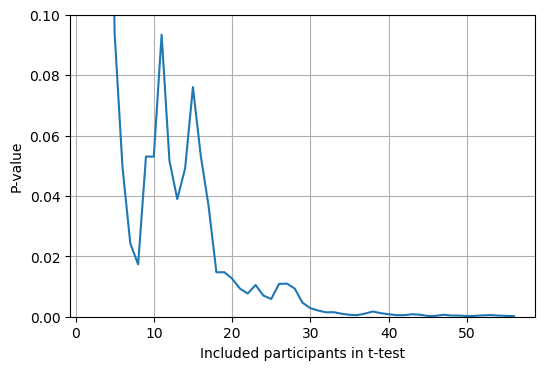

In [164]:
p_values = []
x = []
for i in range(len(hits[...,0])):
    selected = [val for val in range(0,i)]
    statistics, p_value = stats.ttest_ind(hits[selected,1],hits[selected,0], equal_var=False)
    p_values.append(p_value)
    x.append(i)
#     print(p_value)
#     print('The P-value is {:.3f}%'.format(p_value*100))
fig, ax2 = plt.subplots(dpi=100)
ax2.plot(x,p_values)
# ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax2.get_yticks()])
plt.xlabel('Included participants in t-test')
plt.ylabel('P-value')
ax2.grid(True)
plt.ylim([0,0.1])
plt.show()

## As related variables
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel

In [116]:
statistics, p_value = stats.ttest_rel(hits[...,1].tolist(),hits[...,0].tolist())
print(p_value)
print('The P-value is {:.4f}%'.format(p_value*100))

7.870809718856041e-06
The P-value is 0.0008%


## Distribution

c:\users\marti\envs\jupyter\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


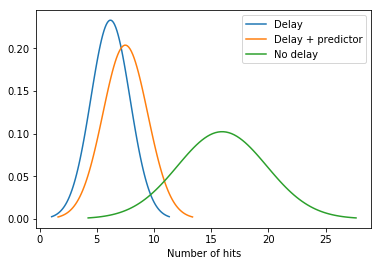

In [77]:
import matplotlib.mlab as mlab
for exp in range(3):
    mu = mus[exp]
    variance = variances[exp]
    sigma = sigmas[exp]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#         plt.plot(x,stats.norm.pdf(x=x, loc=mu, scale=variance), label=exp_dict[exp])
    plt.plot(x,mlab.normpdf(x, mu, sigma), label=exp_dict[exp])
plt.legend()
plt.xlabel('Number of hits')
plt.show()

## Historgram

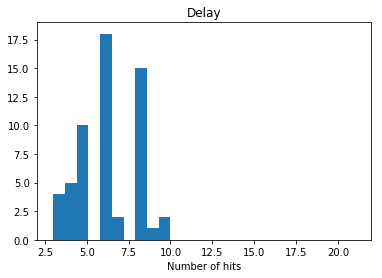

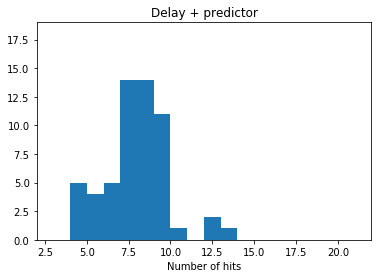

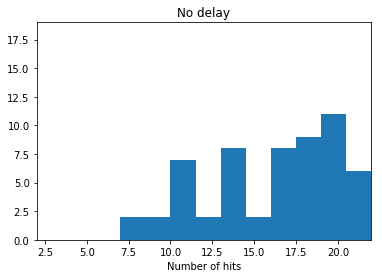

In [101]:
for exp in range(3):
    plt.hist(hits[...,exp])
    plt.legend
    plt.title(exp_dict[exp])
    plt.xlabel('Number of hits')
    plt.xlim([2,22])
    plt.ylim([0,19])
    plt.show()